In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [72]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### Loading Data

In [4]:
train_dataset = pd.read_csv('train.csv')

In [5]:
train_dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test_dataset = pd.read_csv('test.csv')

In [7]:
test_dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


#### Printing shapes of train/test dataset

In [8]:
print('The train dataset has {a} rows and {b} columns'.format(a=train_dataset.shape[0], b=train_dataset.shape[1]))

print('-----------------------------------------------')

print('The test dataset has {a} rows and {b} columns'.format(a=test_dataset.shape[0], b=test_dataset.shape[1]))

The train dataset has 1460 rows and 81 columns
-----------------------------------------------
The test dataset has 1459 rows and 80 columns


#### Checking for columns with missing values

In [9]:
train_dataset.columns[train_dataset.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

#### Computing percentage of missing values in these columns

In [10]:
miss = train_dataset.isnull().sum()/len(train_dataset)

In [11]:
miss = miss[miss > 0]

In [12]:
miss.sort_values(inplace=True)

In [13]:
for i in miss.index:
    print('The percentage of missing data in {} is {} %'.format(i, round(miss[i]*100,2)))

The percentage of missing data in Electrical is 0.07 %
The percentage of missing data in MasVnrType is 0.55 %
The percentage of missing data in MasVnrArea is 0.55 %
The percentage of missing data in BsmtQual is 2.53 %
The percentage of missing data in BsmtCond is 2.53 %
The percentage of missing data in BsmtFinType1 is 2.53 %
The percentage of missing data in BsmtExposure is 2.6 %
The percentage of missing data in BsmtFinType2 is 2.6 %
The percentage of missing data in GarageCond is 5.55 %
The percentage of missing data in GarageQual is 5.55 %
The percentage of missing data in GarageFinish is 5.55 %
The percentage of missing data in GarageType is 5.55 %
The percentage of missing data in GarageYrBlt is 5.55 %
The percentage of missing data in LotFrontage is 17.74 %
The percentage of missing data in FireplaceQu is 47.26 %
The percentage of missing data in Fence is 80.75 %
The percentage of missing data in Alley is 93.77 %
The percentage of missing data in MiscFeature is 96.3 %
The percen

##### Comments: Further analyses needs to be done on columns with extremely high percentages of missing values. In our case, these columns are Fence, Alley, MiscFeature and PoolQC.

#### Visualizing Missing Values

In [14]:
miss = miss.to_frame()

In [15]:
miss.columns = ['count']

In [16]:
miss.index.names = ['columns']

In [17]:
miss['columns'] = miss.index

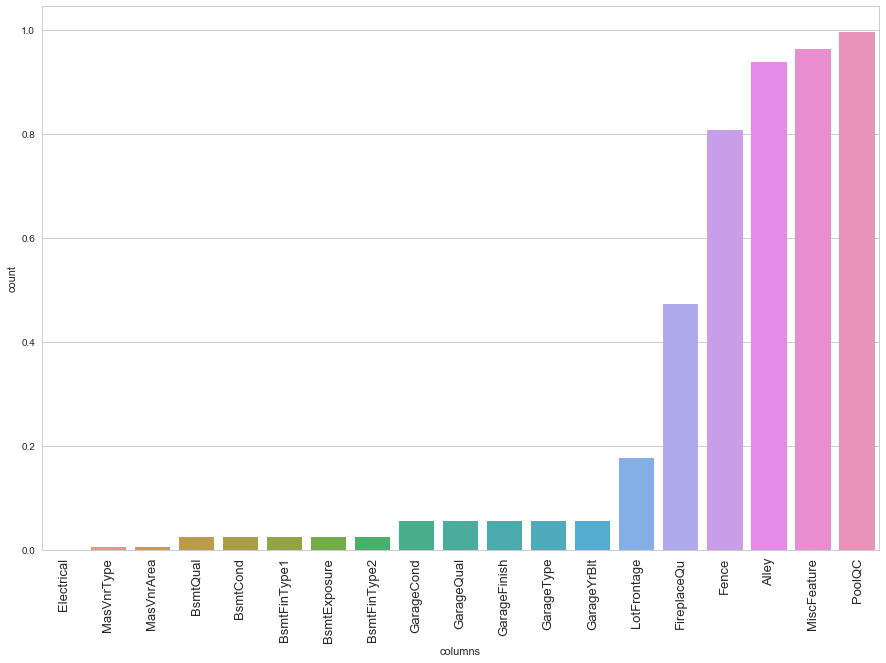

In [18]:
sns.set(style = 'whitegrid', color_codes=True)
plt.figure(figsize = (15,10))

sns.barplot(x='columns', y='count', data=miss)
plt.xticks(rotation = 90, size = 13)
plt.show()

#### Checking distribution of Sales Price (target variable - Y)

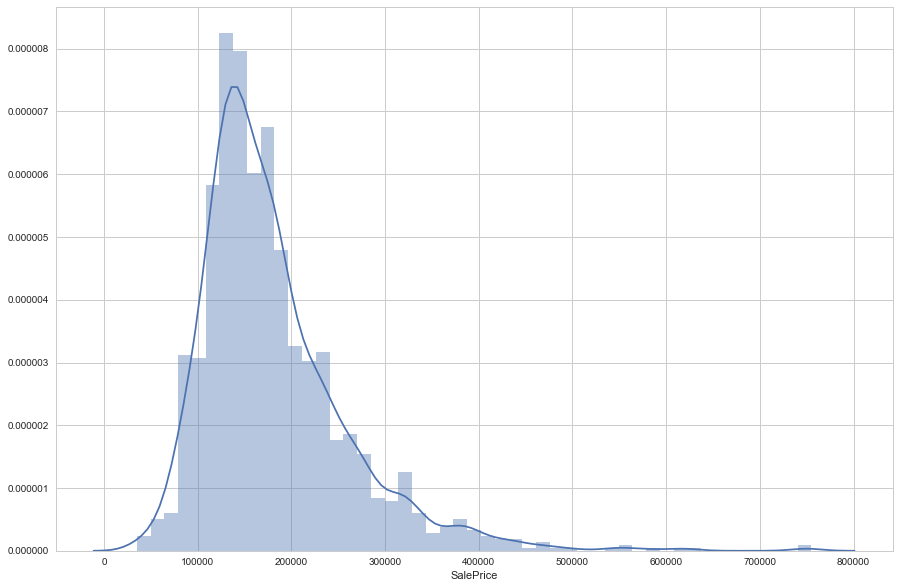

In [19]:
plt.figure(figsize = (15,10))

sns.distplot(train_dataset['SalePrice'])
plt.show()

In [20]:
print('The skewness of Sale Price is {}'. format(round(train_dataset['SalePrice'].skew(),2)))

The skewness of Sale Price is 1.88


##### Because the distribution is right-skewed, we will perform log transformation on this variable to derive a normally distributed target variable. This would help us better model the relationship between target and independent variables. In addition, linear algorithms assume constant variance in the error term.

### Performing Log Transformation on Dependent Variable

In [21]:
y_train = np.log(train_dataset['SalePrice'])

In [22]:
print('After log transform, the skewness of Sale Price is {}'.format(round(y_train.skew(),2)))

After log transform, the skewness of Sale Price is 0.12


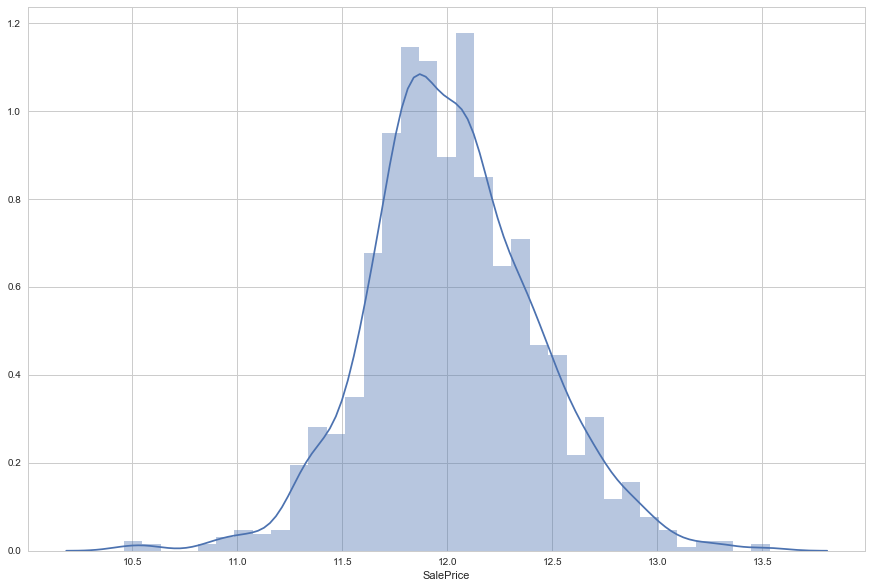

In [23]:
plt.figure(figsize = (15,10))

sns.distplot(y_train)

plt.show()

### Seperating Numeric and Categorical Variables

In [24]:
numeric_data = train_dataset.select_dtypes(include=[np.number])

In [25]:
numeric_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


#### Removing Id Column

In [26]:
del numeric_data['Id']

In [27]:
categorical_data = train_dataset.select_dtypes(exclude=[np.number])

In [28]:
categorical_data.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [29]:
print('There are {a} numeric and {b} categorical columns in the training dataset'.format(a=numeric_data.shape[1], b=categorical_data.shape[1]))

There are 37 numeric and 43 categorical columns in the training dataset


### Performing Correlation plot for numeric variables

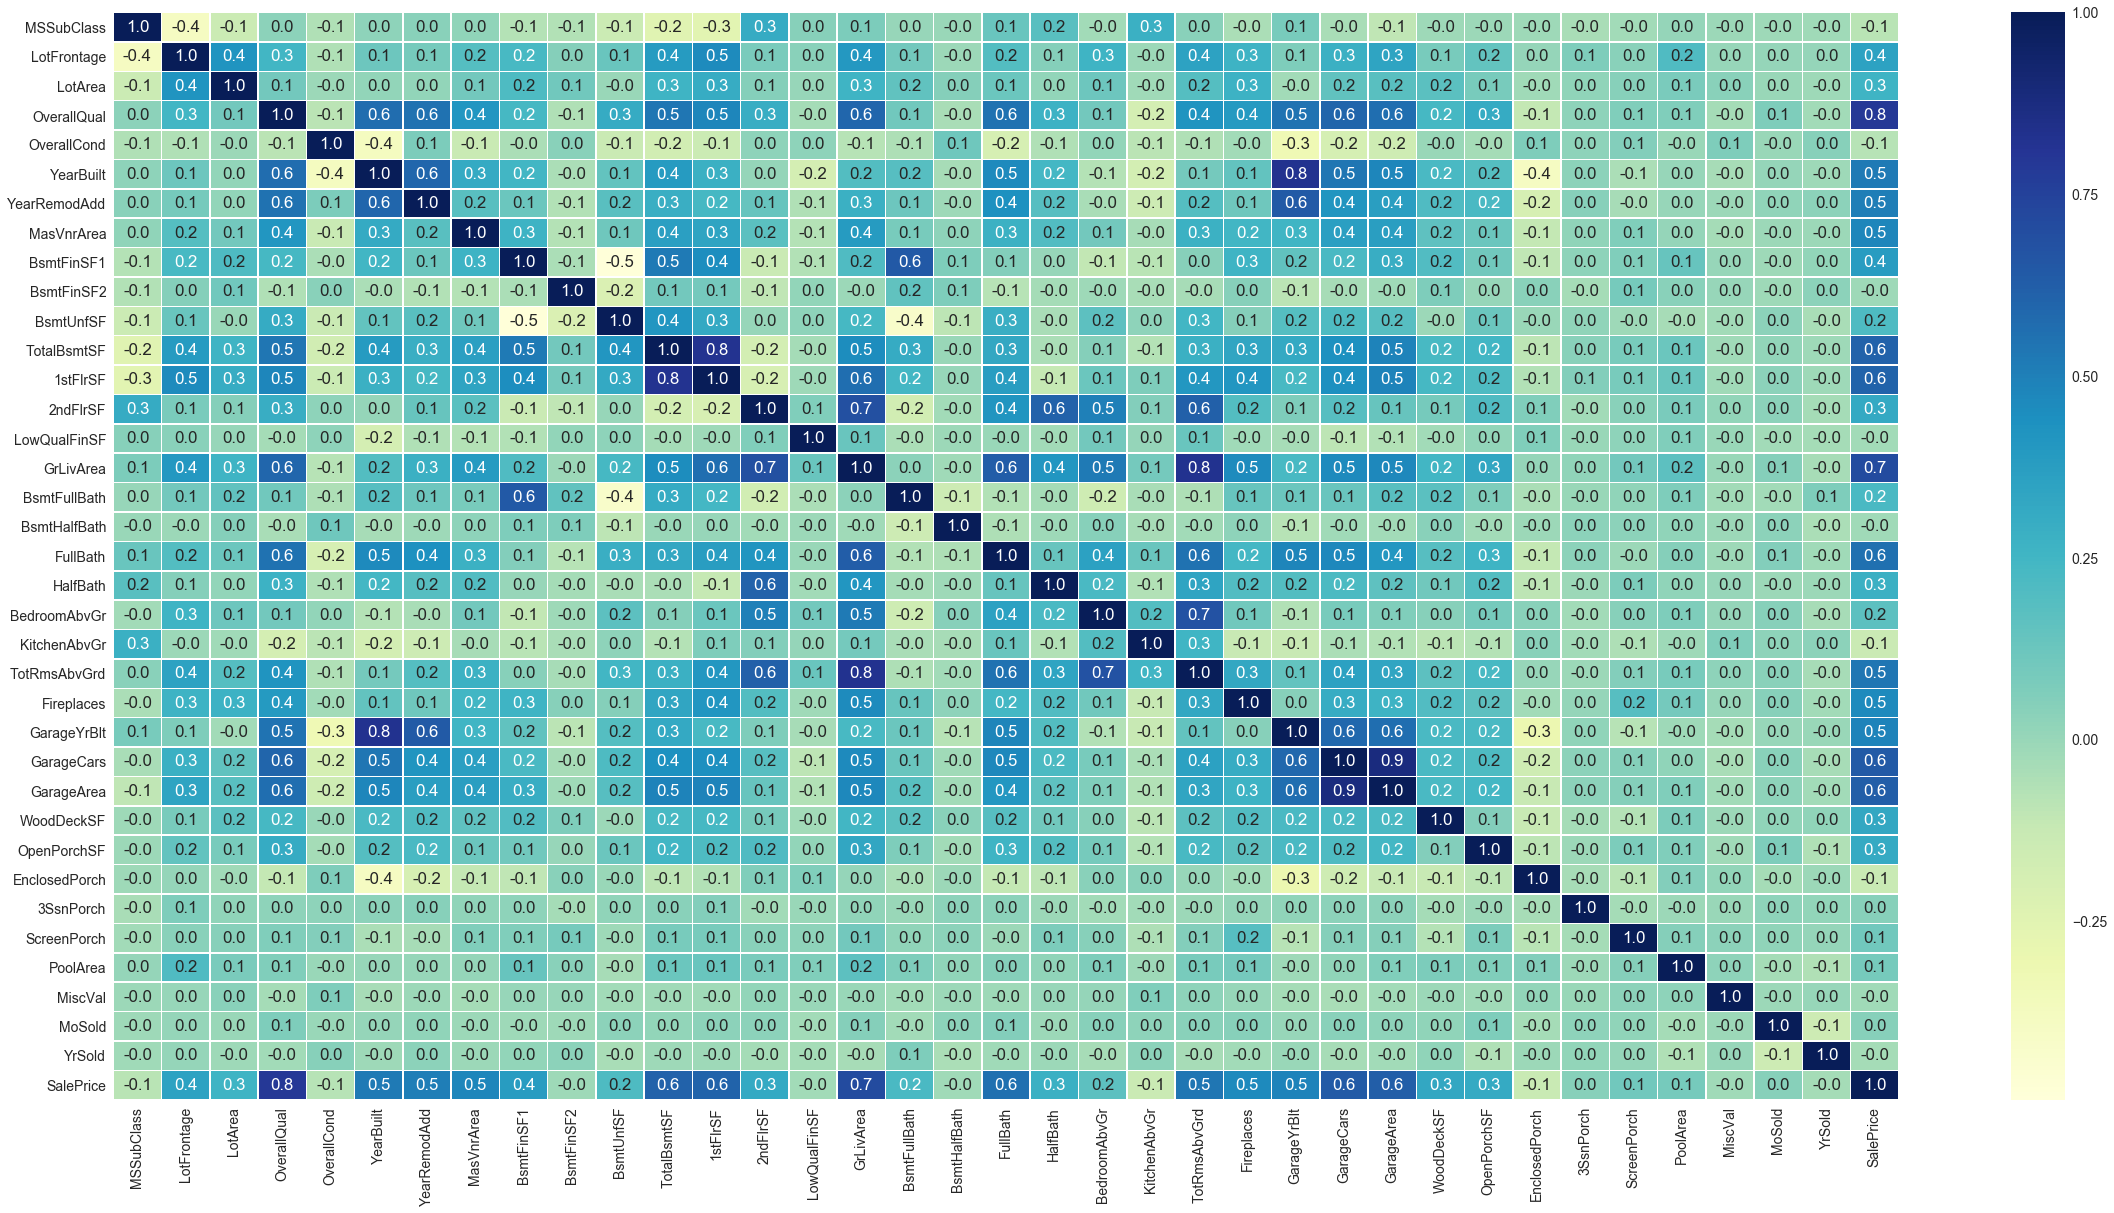

In [91]:
corr = numeric_data.corr()

plt.figure(figsize=(40,20))
sns.set(font_scale=1.4)
sns.heatmap(corr, annot=True, fmt = '.1f', linewidths=.5, cmap = 'YlGnBu')

plt.show()

#### Focusing on variables with strong correlation with Sales Price

In [31]:
print('Top 15 Correlations')
print()
print(corr['SalePrice'].sort_values(ascending=False)[:15], '\n')
print('--------------------------------------------------')
print('Bottom 5 Correlations')
print()
print(corr['SalePrice'].sort_values(ascending=False)[-5:])

Top 15 Correlations

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64 

--------------------------------------------------
Bottom 5 Correlations

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


##### Comments: 

##### 1) Ignoring the SalesPrice variable (since we are studying SalesPrice), the second highest correlated variable is 'OverallQual'. As described in the data dictionary, OverallQual is a variable that deals with the overall material and quality of materials used in a completed house. This would therefore affect the Sales Price!

##### 2) After OverallQual, GrLivArea which represents Above Ground Living Area has the second highest correlation with SalesPrice

#### Taking a look at Overall Quality

In [32]:
train_dataset['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

#### OverallQual is an ordinal variable

In [33]:
pivot1 = train_dataset.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)

In [34]:
pivot1

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


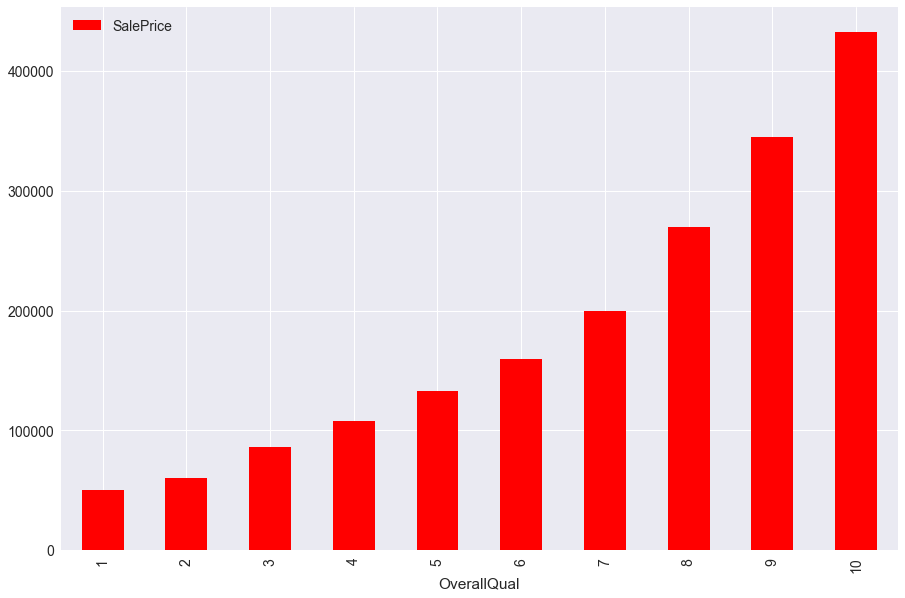

In [93]:
pivot1.plot(kind='bar', color='red', figsize=(15,10))

#### Taking a look at Ground Living Area

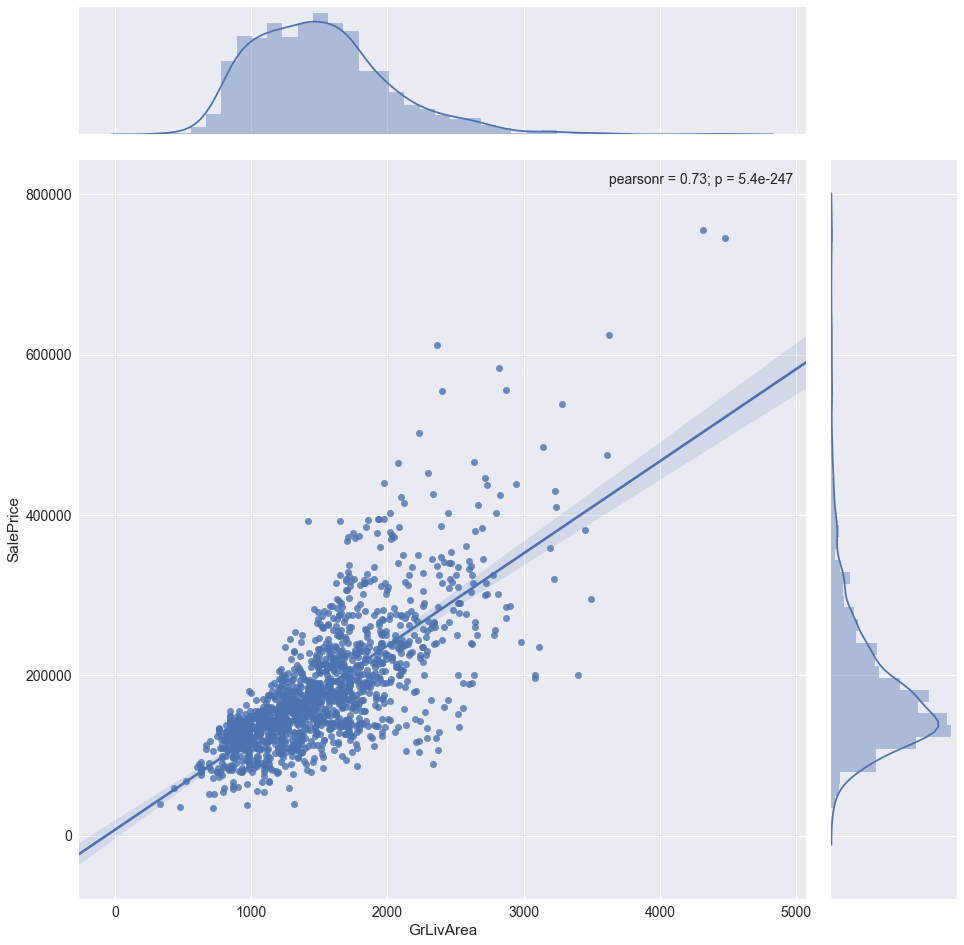

In [100]:
g = sns.jointplot(x=train_dataset['GrLivArea'], y=train_dataset['SalePrice'], kind="reg")
g.fig.set_size_inches(15,15)

#### Comments: After plotting, we noticed 4 outliers. 2 (bottom right corners) of which do not make sense under normal circumstances. We will have to account for these outliers later unless tree-based algorithms are used, since tree-based algorithms are not susceptible to outliers.

#### Taking a look at Garage Cars

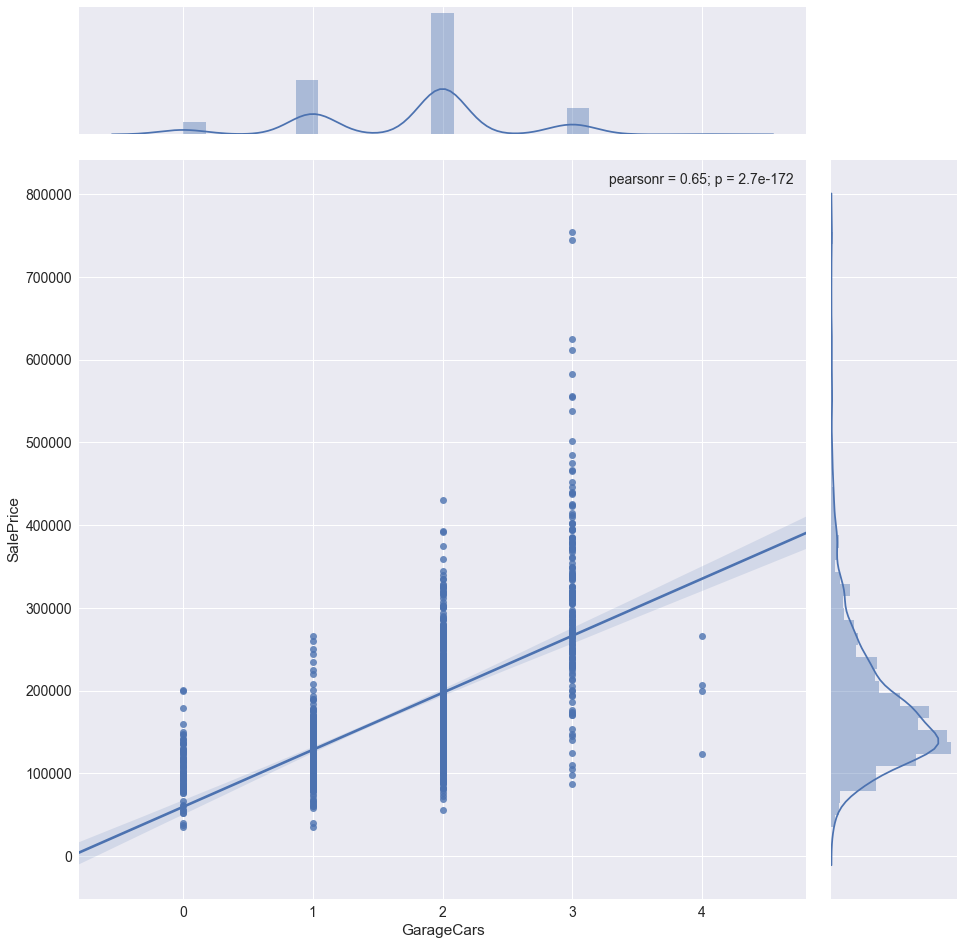

In [112]:
g = sns.jointplot(x=train_dataset['GarageCars'], y=train_dataset['SalePrice'], kind='reg')
g.fig.set_size_inches(15,15)

In [116]:
from scipy.stats import spearmanr

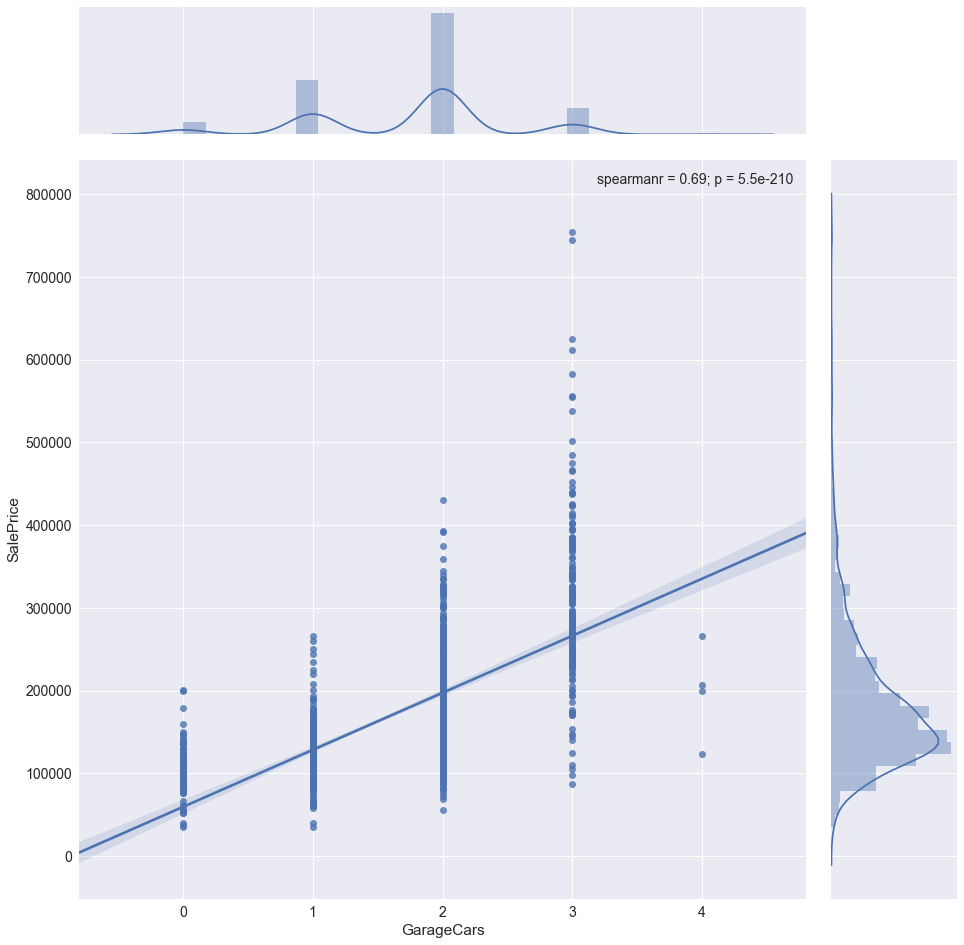

In [117]:
g = sns.jointplot(x=train_dataset['GarageCars'], y=train_dataset['SalePrice'], kind='reg', stat_func=spearmanr)
g.fig.set_size_inches(15,15)

#### Taking a look at Garage Area

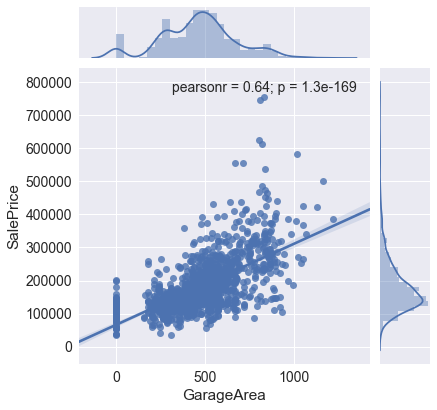

In [97]:
sns.jointplot(x=train_dataset['GarageArea'], y=train_dataset['SalePrice'], kind="reg")

#### Taking a look at Basement Square Footage

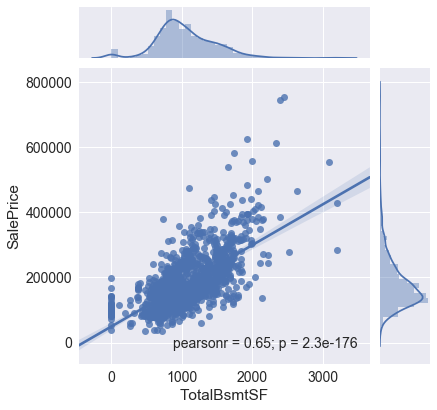

In [98]:
sns.jointplot(x=train_dataset['TotalBsmtSF'], y=train_dataset['SalePrice'], kind="reg")

#### Taking a look at 1st Floor Square Footage

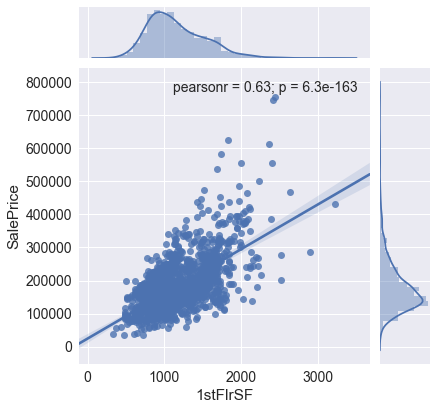

In [99]:
sns.jointplot(x=train_dataset['1stFlrSF'], y=train_dataset['SalePrice'], kind="reg")

In [41]:
nd = pd.melt(numeric_data, value_vars = numeric_data.columns)

The percentage of missing data in Electrical is 0.07 %
The percentage of missing data in MasVnrType is 0.55 %
The percentage of missing data in MasVnrArea is 0.55 %
The percentage of missing data in BsmtQual is 2.53 %
The percentage of missing data in BsmtCond is 2.53 %
The percentage of missing data in BsmtFinType1 is 2.53 %
The percentage of missing data in BsmtExposure is 2.6 %
The percentage of missing data in BsmtFinType2 is 2.6 %
The percentage of missing data in GarageCond is 5.55 %
The percentage of missing data in GarageQual is 5.55 %
The percentage of missing data in GarageFinish is 5.55 %
The percentage of missing data in GarageType is 5.55 %
The percentage of missing data in GarageYrBlt is 5.55 %
The percentage of missing data in LotFrontage is 17.74 %
The percentage of missing data in FireplaceQu is 47.26 %
The percentage of missing data in Fence is 80.75 %
The percentage of missing data in Alley is 93.77 %
The percentage of missing data in MiscFeature is 96.3 %
The percentage of missing data in PoolQC is 99.52 %

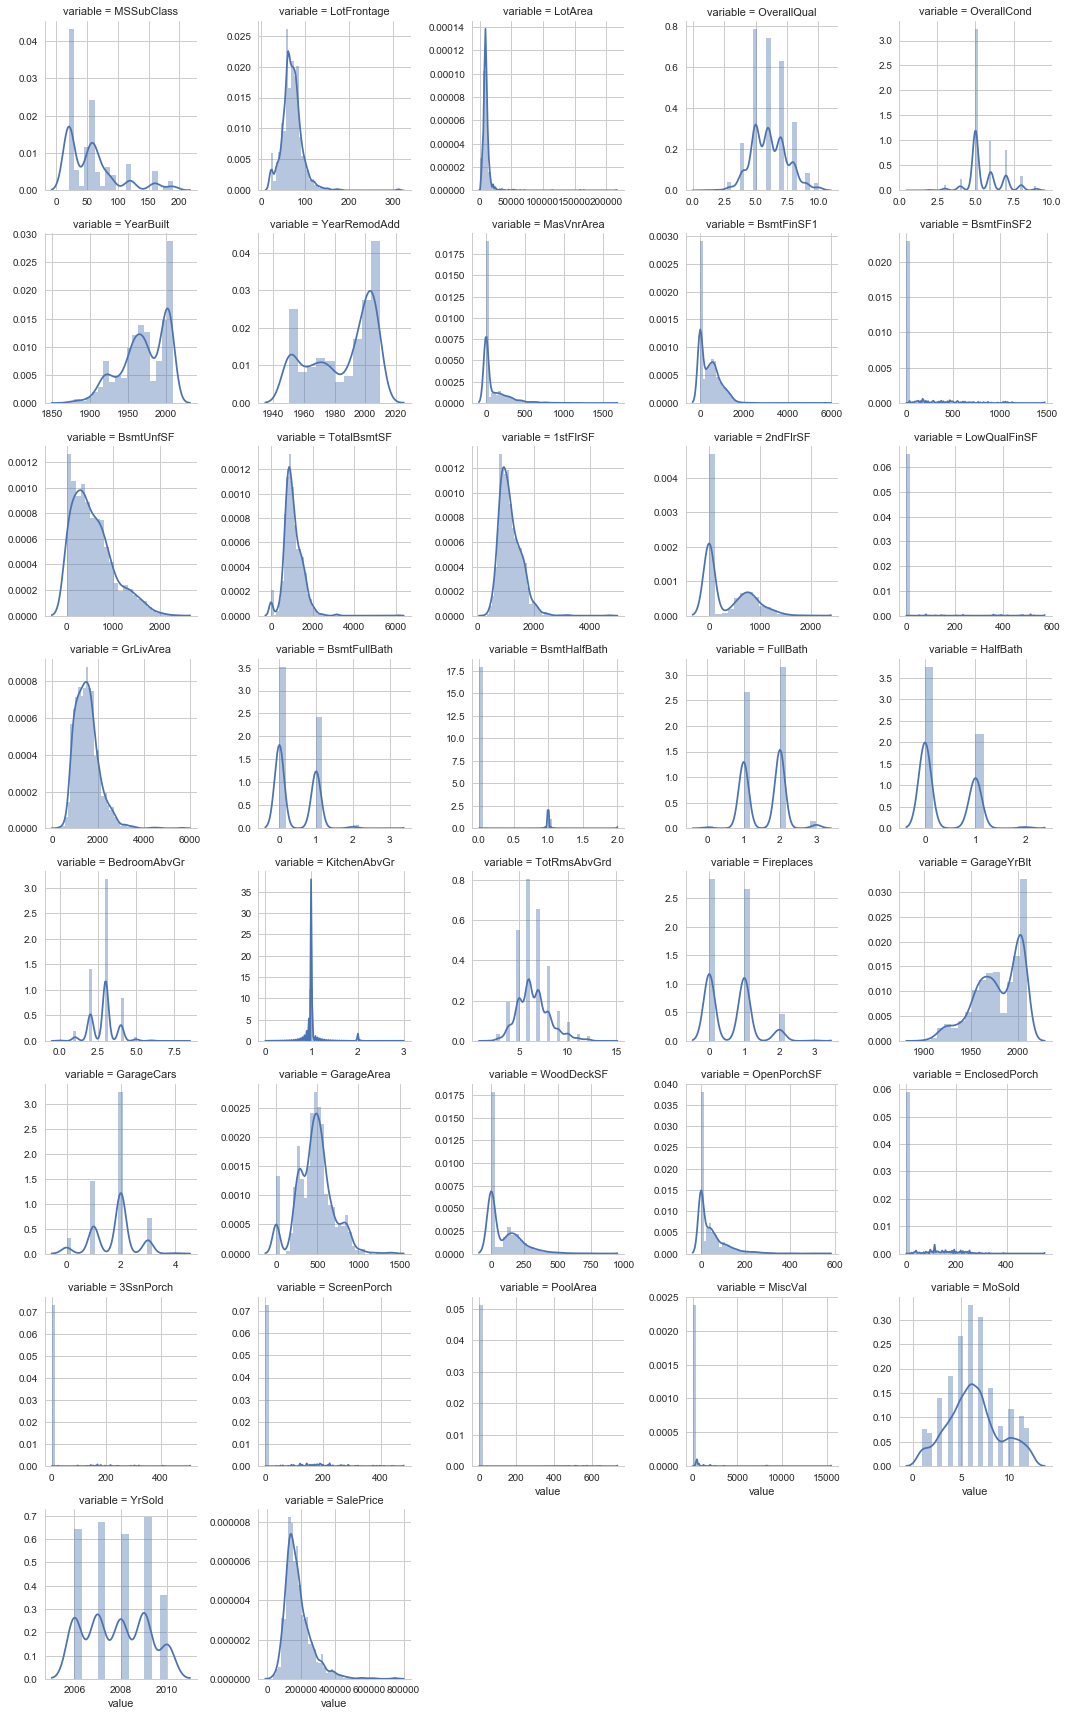

In [42]:
n1 = sns.FacetGrid(nd, col='variable', col_wrap=5, sharex=False, sharey=False)
n1 = n1.map(sns.distplot, 'value')
n1

#### Comments: For numeric variables which experience various skewness, a log transformation will have to be applied in cases where linear algorithms are being used.

### Focusing on Categorical Variables

In [43]:
categorical_data.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


#### Pivot table showing relationship between Sale Condition and Sales Price

In [44]:
pivot2 = train_dataset.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)

In [45]:
pivot2

,SalePrice
SaleCondition,
Abnorml,130000
AdjLand,104000
Alloca,148145
Family,140500
Normal,160000
Partial,244600


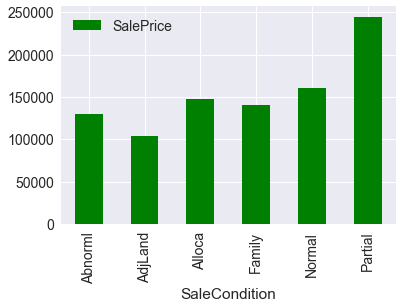

In [110]:
pivot2.plot(kind='bar', color='green')

#### Performing ANOVA to determine significant difference between categorical variables

##### Null Hypothesis (H0) - There exists no significant difference between the groups.

##### Alternate Hypothesis (HA) - There exists a significant difference between the groups

#### Function to calculate P-values and Disparity Score

In [47]:
def anova(dataset):
    anv = pd.DataFrame()
    anv['Features'] = categorical_data.columns
    categorical_variables = list(categorical_data.columns)
    pvals = []
    for variable in categorical_variables:
        samples = []
        for column in dataset[variable].unique():
            s = dataset[dataset[variable] == column]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

/Users/Weiyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/Weiyang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2958: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / float(len(a))


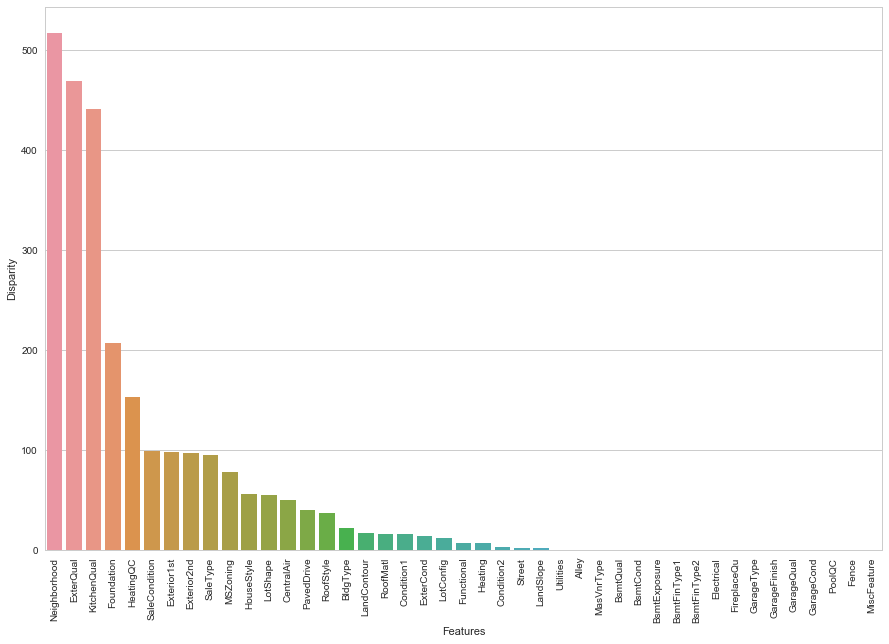

In [49]:
categorical_data['SalePrice'] = train_dataset['SalePrice'].values

k = anova(categorical_data)
k = k[k['Features'] != 'SalePrice']
k['Disparity'] = np.log(1./k['pval'].values)

plt.figure(figsize = (15,10))
sns.barplot(data=k, x='Features', y='Disparity')
plt.xticks(rotation = 90)
plt.show()

#### Comments: Neighborhood, ExterQual and KitchenQual are the top 3 categorical variables which are considered to be important in affecting Sales Price

In [50]:
def boxplot(x,y, **kwargs):
    sns.boxplot(x=x, y=y)
    x = plt.xticks(rotation=90)

In [51]:
cat = [f for f in train_dataset.columns if train_dataset.dtypes[f] == 'object']

In [52]:
p = pd.melt(categorical_data, id_vars = 'SalePrice', value_vars = cat)

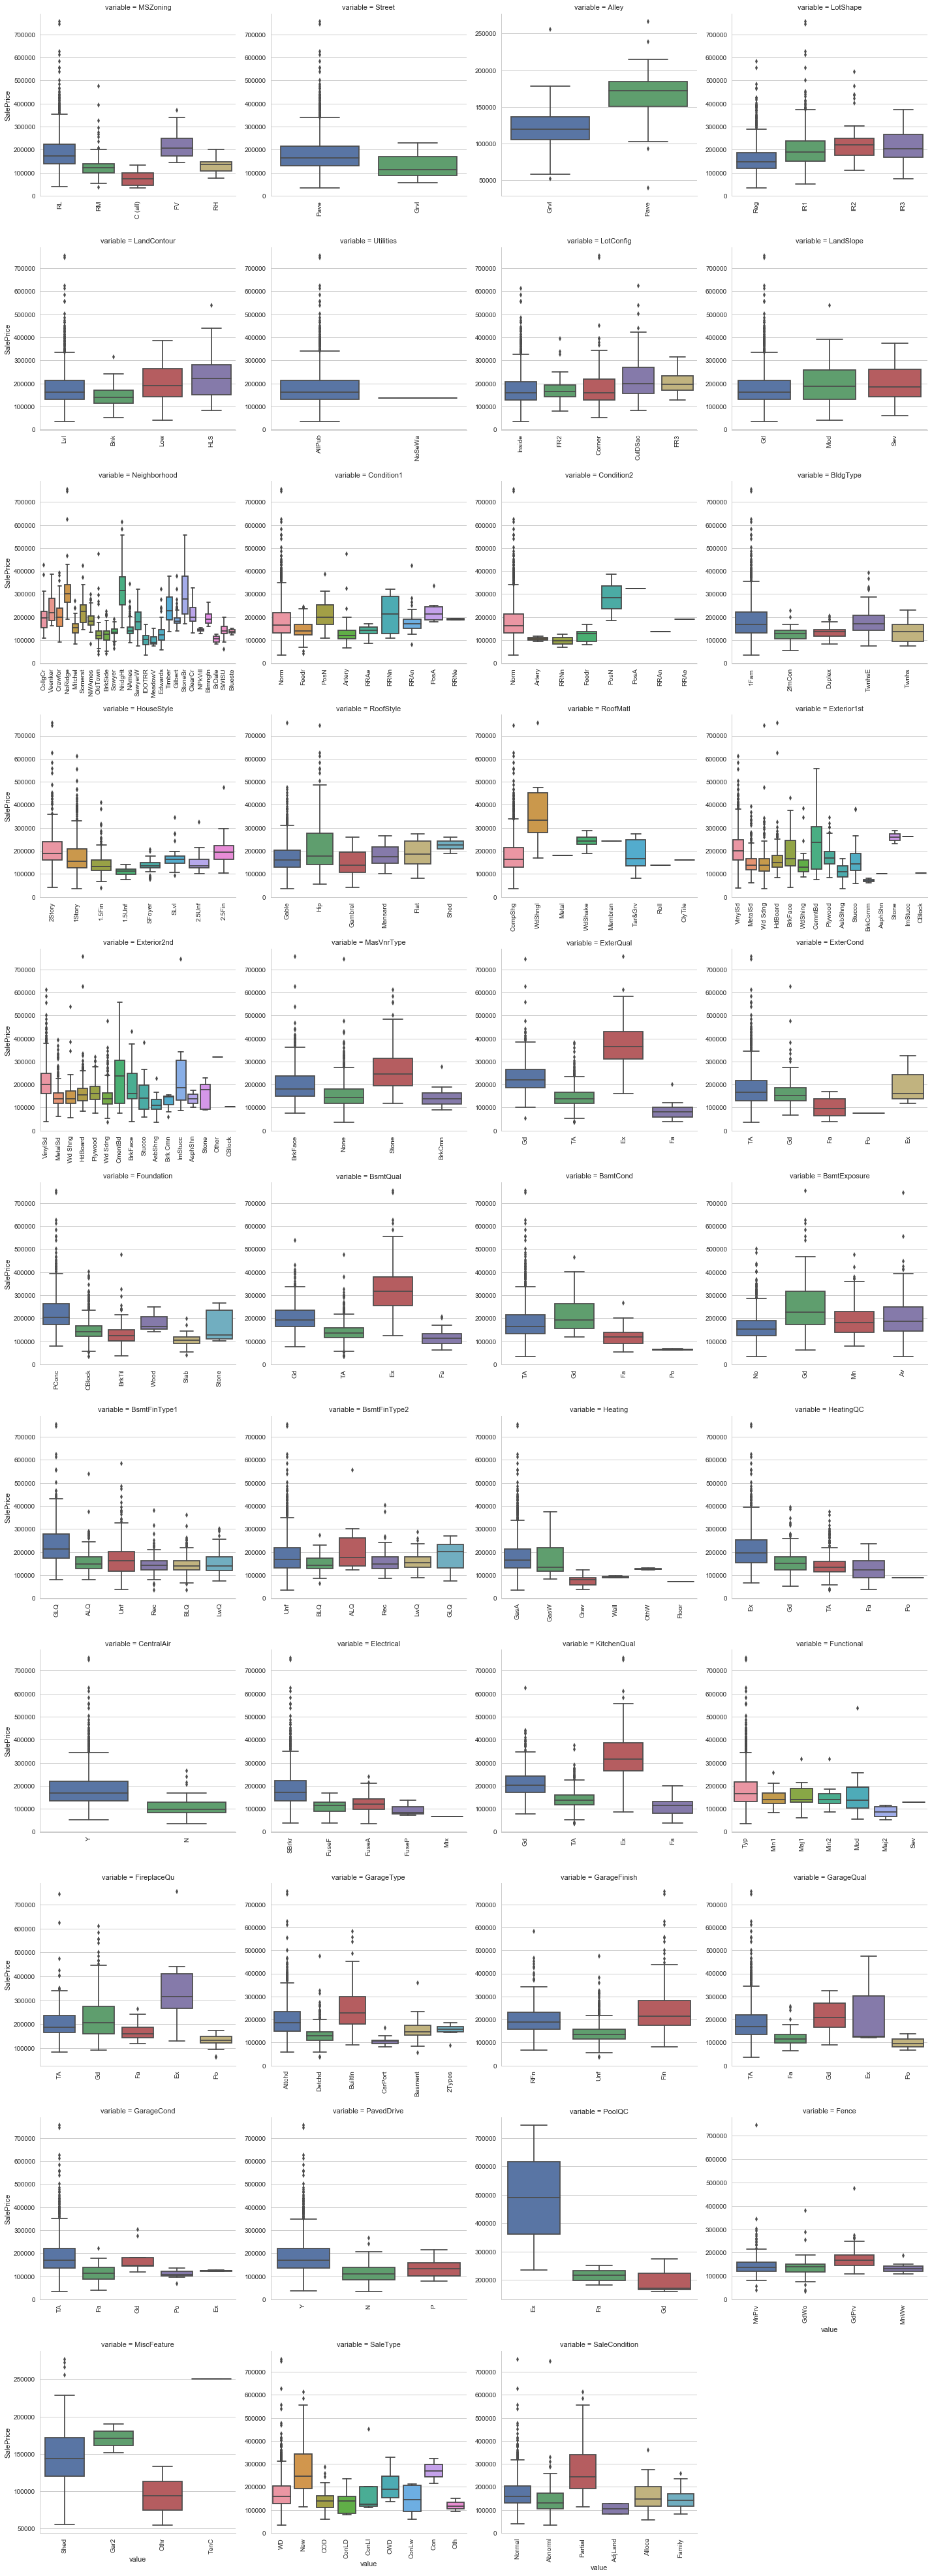

In [53]:
g = sns.FacetGrid(p, col='variable', col_wrap = 4, sharex=False, sharey=False, size=5)
g = g.map(boxplot, 'value', 'SalePrice')
g

### Data Pre-processing

#### Outlier Removal - Above Ground Living Area (GrLivArea)

In [54]:
train_dataset.shape

(1460, 81)

In [55]:
train_dataset.drop(train_dataset[(train_dataset['GrLivArea'] > 4000) & (train_dataset['SalePrice'] < 200000)].index, inplace=True)

In [56]:
train_dataset.shape

(1458, 81)

#### Outlier Removal - Garage Area

In [57]:
train_dataset.drop(train_dataset[(train_dataset['GarageArea'] > 1200) & (train_dataset['SalePrice'] < 300000)].index, inplace=True)

In [58]:
train_dataset.shape

(1455, 81)

#### Performing LabelEncoder

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
le = LabelEncoder()

In [61]:
def factorize(data, var, fill_na = None):
    
    if fill_na is not None:
        data[var].fillna(fill_na, inplace = True)
    le.fit(data[var])
    data[var] = le.transform(data[var])
    return data

#### This function allows for the imputation of NAs with any chosen value (median, mean, mode)